<a href="https://colab.research.google.com/github/nalrob/Procesamiento_de_datos/blob/main/Practica6_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install albumentations

In [ ]:
from albumentations.pytorch import To Tensor

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving FIRE_images.zip to FIRE_images.zip


In [ ]:
import zipfile
import io
data=zipfile.ZipFile(io.BytesIO(uploaded['FIRE_images.zip']),'r')
data.extractall()

In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import StratifiedShuffleSplit
from keras.preprocessing.image import load_img


sns.set_style('darkgrid')

In [ ]:
from PIL import Image

# Lista de carpetas de imágenes y sus etiquetas
folders = [

    ("/content/fire_images", "fire"),
    ("/content/non_fire_images", "non_fire")
]

dfs = []


for folder_path, label in folders:
    data = []
    for dirname, _, filenames in os.walk(folder_path):
        for filename in filenames:
            if filename.endswith(('.png')):  # Ajusta las extensiones permitidas
                img_path = os.path.join(dirname, filename)
                data.append({'path': img_path, 'label': label})
    df_temp = pd.DataFrame(data)
    dfs.append(df_temp)


df = pd.concat(dfs, ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
print(df.head(10))


                                        path     label
0   /content/non_fire_images/non_fire.21.png  non_fire
1  /content/non_fire_images/non_fire.220.png  non_fire
2          /content/fire_images/fire.244.png      fire
3   /content/non_fire_images/non_fire.12.png  non_fire
4    /content/non_fire_images/non_fire.7.png  non_fire
5   /content/non_fire_images/non_fire.48.png  non_fire
6  /content/non_fire_images/non_fire.157.png  non_fire
7  /content/non_fire_images/non_fire.133.png  non_fire
8           /content/fire_images/fire.68.png      fire
9          /content/fire_images/fire.239.png      fire


In [ ]:
# Variable ImageId Extraer los valores después del último "/"
df['ImageId'] = df['path'].apply(lambda x: x.rsplit('/', 1)[-1])


#Variable ClassId

label_mapping = {"fire": 1, "non_fire": 0}
df['ClassId'] = df['label'].replace(label_mapping)
#df['ClassId'] = df['label'].fillna(0).astype(int)


print(df)

                                          path     label           ImageId  \
0     /content/non_fire_images/non_fire.21.png  non_fire   non_fire.21.png   
1    /content/non_fire_images/non_fire.220.png  non_fire  non_fire.220.png   
2            /content/fire_images/fire.244.png      fire      fire.244.png   
3     /content/non_fire_images/non_fire.12.png  non_fire   non_fire.12.png   
4      /content/non_fire_images/non_fire.7.png  non_fire    non_fire.7.png   
..                                         ...       ...               ...   
463   /content/non_fire_images/non_fire.98.png  non_fire   non_fire.98.png   
464  /content/non_fire_images/non_fire.164.png  non_fire  non_fire.164.png   
465  /content/non_fire_images/non_fire.213.png  non_fire  non_fire.213.png   
466          /content/fire_images/fire.151.png      fire      fire.151.png   
467   /content/non_fire_images/non_fire.42.png  non_fire   non_fire.42.png   

     ClassId  
0          0  
1          0  
2          1  
3  

In [ ]:
from PIL import Image
import pandas as pd
import io
import base64


def extract_encoded_pixels(png_path):
    try:
        with open(png_path, 'rb') as image_file:
            # Leer la imagen en formato binario
            image_binary = image_file.read()

        # Convertir la imagen binaria a base64
        encoded_pixels = base64.b64encode(image_binary).decode('utf-8')
        return encoded_pixels
    except Exception as e:
        # Manejar cualquier excepción que pueda ocurrir
        return None

df['EncodedPixels'] = df['path'].apply(extract_encoded_pixels)
df

,path,label,ImageId,ClassId,EncodedPixels
0,/content/non_fire_images/non_fire.21.png,non_fire,non_fire.21.png,0,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUDBAQEAwUEBA...
1,/content/non_fire_images/non_fire.220.png,non_fire,non_fire.220.png,0,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoICA...
2,/content/fire_images/fire.244.png,fire,fire.244.png,1,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDABALDA4MChAODQ...
3,/content/non_fire_images/non_fire.12.png,non_fire,non_fire.12.png,0,/9j/4AAQSkZJRgABAQAAAQABAAD//gA7Q1JFQVRPUjogZ2...
4,/content/non_fire_images/non_fire.7.png,non_fire,non_fire.7.png,0,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAQCAwMDAgQDAw...
...,...,...,...,...,...
463,/content/non_fire_images/non_fire.98.png,non_fire,non_fire.98.png,0,/9j/4Tc0RXhpZgAASUkqAAgAAAALAA4BAgA9AAAAkgAAAA...
464,/content/non_fire_images/non_fire.164.png,non_fire,non_fire.164.png,0,/9j/4AAQSkZJRgABAQIAdgB2AAD/2wCEAAICAgICAgMDAw...
465,/content/non_fire_images/non_fire.213.png,non_fire,non_fire.213.png,0,/9j/4QA8RXhpZgAASUkqAAgAAAABAJiCAgAYAAAAGgAAAA...
466,/content/fire_images/fire.151.png,fire,fire.151.png,1,/9j/4AAQSkZJRgABAQAAAQABAAD//gA7Q1JFQVRPUjogZ2...


In [ ]:
import os
import cv2
import pdb
import time
import warnings
import random
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torch.utils.data import DataLoader, Dataset, sampler
from matplotlib import pyplot as plt
from albumentations import (HorizontalFlip, ShiftScaleRotate, Normalize, Resize, Compose, GaussNoise)
warnings.filterwarnings("ignore")
seed = 69
random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)
np.random.seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [ ]:
df = df.pivot(index='ImageId',columns='ClassId',values='EncodedPixels')

ClassId,0,1
ImageId,,
fire.1.png,NaN,/9j/4QBSRXhpZgAASUkqAAgAAAABAJiCAgAtAAAAGgAAAA...
fire.10.png,NaN,/9j/4AAQSkZJRgABAQEBOgE6AAD/4TqmRXhpZgAATU0AKg...
fire.100.png,NaN,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAIBAQIBAQICAg...
fire.101.png,NaN,/9j/4AAQSkZJRgABAQEASABIAAD/2wBDABALDA4MChAODQ...
fire.102.png,NaN,/9j/4AAQSkZJRgABAQABLAEsAAD/4gJASUNDX1BST0ZJTE...
...,...,...
non_fire.95.png,/9j/4AAQSkZJRgABAQEBLAEsAAD/7QQsUGhvdG9zaG9wID...,NaN
non_fire.96.png,/9j/2wBDAA0JCgsKCA0LCgsODg0PEyAVExISEyccHhcgLi...,NaN
non_fire.97.png,/9j/4AAQSkZJRgABAQAAAQABAAD/4QCURXhpZgAATU0AKg...,NaN


In [ ]:
from collections import defaultdict
import copy
import random
import os
import shutil
from urllib.request import urlretrieve

import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.optim
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models

cudnn.benchmark = True

In [ ]:
class TqdmUpTo(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)


def download_url(url, filepath):
    directory = os.path.dirname(os.path.abspath(filepath))
    os.makedirs(directory, exist_ok=True)
    if os.path.exists(filepath):
        print("Filepath already exists. Skipping download.")
        return

    with TqdmUpTo(unit="B", unit_scale=True, unit_divisor=1024, miniters=1, desc=os.path.basename(filepath)) as t:
        urlretrieve(url, filename=filepath, reporthook=t.update_to, data=None)
        t.total = t.n


def extract_archive(filepath):
    extract_dir = os.path.dirname(os.path.abspath(filepath))
    shutil.unpack_archive(filepath, extract_dir)

In [ ]:
import cv2
import numpy as np

X, y, image_paths = [], [], []  # Agregamos una lista para almacenar las rutas de las imágenes

for index, row in df.iterrows():
    image_path = row['path']
    label = row['label']

    img = cv2.imread(image_path)

    # Normalización
    if img is not None:
        img = cv2.resize(img, (64, 64))
        img = img.reshape(64 * 64 * 3)

        X.append(img)
        y.append(label)
        image_paths.append(image_path)  # Almacenamos la ruta de la imagen

X_samp = np.array(X)
y_samp = np.array(y)
images= np.array(image_paths)

In [ ]:
correct_images_filepaths = [i for i in image_paths if cv2.imread(i) is not None]

In [ ]:
random.seed(42)
random.shuffle(correct_images_filepaths)
train_images_filepaths = correct_images_filepaths[:20000]
val_images_filepaths = correct_images_filepaths[20000:-10]
test_images_filepaths = correct_images_filepaths[-10:]
print(len(train_images_filepaths), len(val_images_filepaths), len(test_images_filepaths))

467 0 10


Define a function to visualize images and their labels

In [ ]:
def display_image_grid(images_filepaths, predicted_labels=(), cols=5):
    rows = len(images_filepaths) // cols
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6))
    for i, image_filepath in enumerate(images_filepaths):
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        true_label = os.path.normpath(image_filepath).split(os.sep)[-2]
        predicted_label = predicted_labels[i] if predicted_labels else true_label
        color = "green" if true_label == predicted_label else "red"
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_title(predicted_label, color=color)
        ax.ravel()[i].set_axis_off()
    plt.tight_layout()
    plt.show()

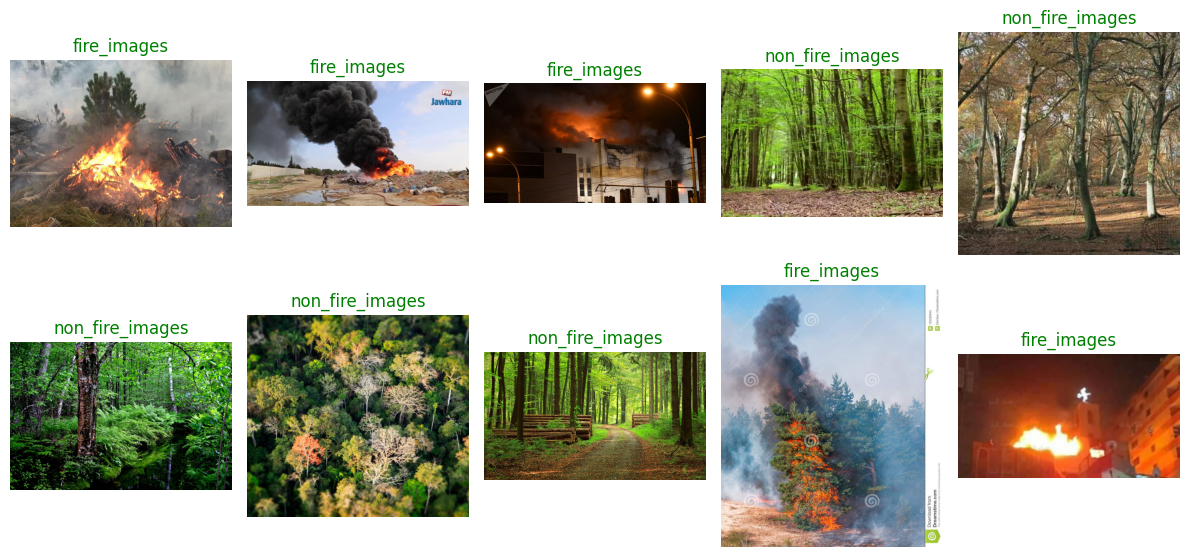

In [ ]:
display_image_grid(test_images_filepaths)

Define a PyTorch dataset class

In [ ]:
class FireDataset(Dataset):
    def __init__(self, images_filepaths, transform=None):
        self.images_filepaths = images_filepaths
        self.transform = transform

    def __len__(self):
        return len(self.images_filepaths)

    def __getitem__(self, idx):
        image_filepath = self.images_filepaths[idx]
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if os.path.normpath(image_filepath).split(os.sep)[-2] == "fire_images":
            label = 1.0
        else:
            label = 0.0
        if self.transform is not None:
            image = self.transform(image=image)["image"]
        return image, label

Use Albumentations to define transformation functions for the train and validation datasets

In [ ]:
train_transform = A.Compose(
    [
        A.SmallestMaxSize(max_size=160),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.RandomCrop(height=128, width=128),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)
train_dataset = FireDataset(images_filepaths=train_images_filepaths, transform=train_transform)

In [ ]:
val_transform = A.Compose(
    [
        A.SmallestMaxSize(max_size=160),
        A.CenterCrop(height=128, width=128),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)
val_dataset = FireDataset(images_filepaths=val_images_filepaths, transform=val_transform)

In [ ]:
def visualize_augmentations(dataset, idx=0, samples=10, cols=5):
    dataset = copy.deepcopy(dataset)
    dataset.transform = A.Compose([t for t in dataset.transform if not isinstance(t, (A.Normalize, ToTensorV2))])
    rows = samples // cols
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6))
    for i in range(samples):
        image, _ = dataset[idx]
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_axis_off()
    plt.tight_layout()
    plt.show()

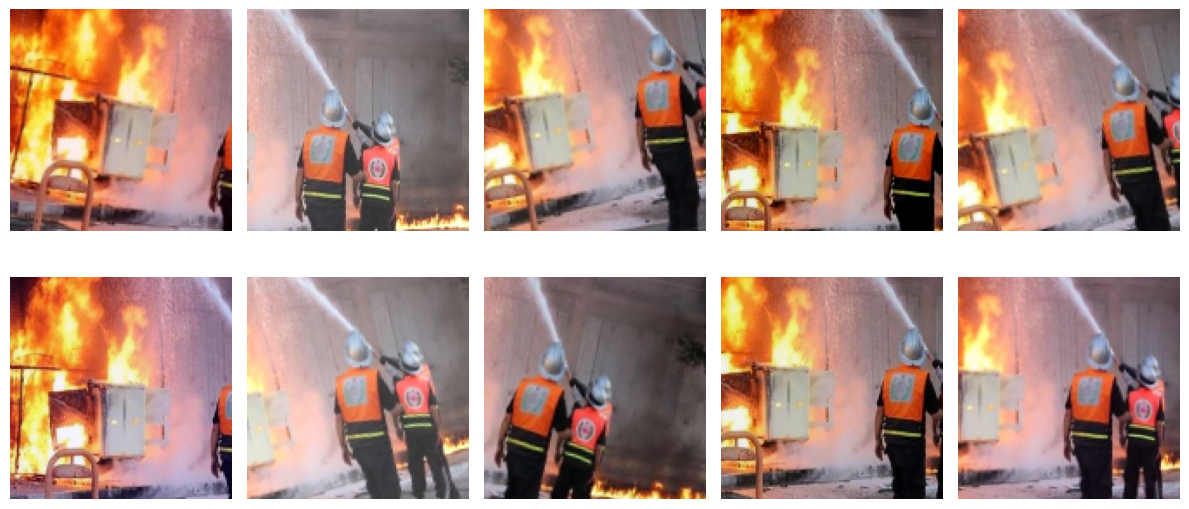

In [ ]:
random.seed(42)
visualize_augmentations(train_dataset)

Define helpers for training

In [ ]:
def calculate_accuracy(output, target):
    output = torch.sigmoid(output) >= 0.5
    target = target == 1.0
    return torch.true_divide((target == output).sum(dim=0), output.size(0)).item()

In [ ]:
class MetricMonitor:
    def __init__(self, float_precision=3):
        self.float_precision = float_precision
        self.reset()

    def reset(self):
        self.metrics = defaultdict(lambda: {"val": 0, "count": 0, "avg": 0})

    def update(self, metric_name, val):
        metric = self.metrics[metric_name]

        metric["val"] += val
        metric["count"] += 1
        metric["avg"] = metric["val"] / metric["count"]

    def __str__(self):
        return " | ".join(
            [
                "{metric_name}: {avg:.{float_precision}f}".format(
                    metric_name=metric_name, avg=metric["avg"], float_precision=self.float_precision
                )
                for (metric_name, metric) in self.metrics.items()
            ]
        )

Define training parameters

In [ ]:
params = {
    "model": "resnet50",
    "device": "cuda",
    "lr": 0.001,
    "batch_size": 64,
    "num_workers": 4,
    "epochs": 10,
}

Create all required objects and functions for training and validation

In [ ]:
model = getattr(models, params["model"])(pretrained=False, num_classes=1,)
model = model.to(params["device"])
criterion = nn.BCEWithLogitsLoss().to(params["device"])
optimizer = torch.optim.Adam(model.parameters(), lr=params["lr"])

In [ ]:
train_loader = DataLoader(
    train_dataset, batch_size=params["batch_size"], shuffle=True, num_workers=params["num_workers"], pin_memory=True,
)
val_loader = DataLoader(
    val_dataset, batch_size=params["batch_size"], shuffle=False, num_workers=params["num_workers"], pin_memory=True,
)

In [ ]:
def train(train_loader, model, criterion, optimizer, epoch, params):
    metric_monitor = MetricMonitor()
    model.train()
    stream = tqdm(train_loader)
    for i, (images, target) in enumerate(stream, start=1):
        images = images.to(params["device"], non_blocking=True)
        target = target.to(params["device"], non_blocking=True).float().view(-1, 1)
        output = model(images)
        loss = criterion(output, target)
        accuracy = calculate_accuracy(output, target)
        metric_monitor.update("Loss", loss.item())
        metric_monitor.update("Accuracy", accuracy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        stream.set_description(
            "Epoch: {epoch}. Train.      {metric_monitor}".format(epoch=epoch, metric_monitor=metric_monitor)
        )

In [ ]:
def validate(val_loader, model, criterion, epoch, params):
    metric_monitor = MetricMonitor()
    model.eval()
    stream = tqdm(val_loader)
    with torch.no_grad():
        for i, (images, target) in enumerate(stream, start=1):
            images = images.to(params["device"], non_blocking=True)
            target = target.to(params["device"], non_blocking=True).float().view(-1, 1)
            output = model(images)
            loss = criterion(output, target)
            accuracy = calculate_accuracy(output, target)

            metric_monitor.update("Loss", loss.item())
            metric_monitor.update("Accuracy", accuracy)
            stream.set_description(
                "Epoch: {epoch}. Validation. {metric_monitor}".format(epoch=epoch, metric_monitor=metric_monitor)
            )

Train a model

In [ ]:
for epoch in range(1, params["epochs"] + 1):
    train(train_loader, model, criterion, optimizer, epoch, params)
    validate(val_loader, model, criterion, epoch, params)

Epoch: 1. Train.      Loss: 0.999 | Accuracy: 0.607: 100%|██████████| 8/8 [00:25<00:00,  3.19s/it]
0it [00:00, ?it/s]
Epoch: 2. Train.      Loss: 0.480 | Accuracy: 0.795: 100%|██████████| 8/8 [00:15<00:00,  1.96s/it]
0it [00:00, ?it/s]
Epoch: 3. Train.      Loss: 0.545 | Accuracy: 0.825: 100%|██████████| 8/8 [00:12<00:00,  1.62s/it]
0it [00:00, ?it/s]
Epoch: 4. Train.      Loss: 0.358 | Accuracy: 0.838: 100%|██████████| 8/8 [00:12<00:00,  1.51s/it]
0it [00:00, ?it/s]
Epoch: 5. Train.      Loss: 0.296 | Accuracy: 0.873: 100%|██████████| 8/8 [00:13<00:00,  1.73s/it]
0it [00:00, ?it/s]
Epoch: 6. Train.      Loss: 0.240 | Accuracy: 0.892: 100%|██████████| 8/8 [00:12<00:00,  1.54s/it]
0it [00:00, ?it/s]
Epoch: 7. Train.      Loss: 0.211 | Accuracy: 0.912: 100%|██████████| 8/8 [00:12<00:00,  1.58s/it]
0it [00:00, ?it/s]
Epoch: 8. Train.      Loss: 0.241 | Accuracy: 0.896: 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]
0it [00:00, ?it/s]
Epoch: 9. Train.      Loss: 0.264 | Accuracy: 0.880: 100

Predict labels for images and visualize those predictions

In [ ]:
class FireInferenceDataset(Dataset):
    def __init__(self, images_filepaths, transform=None):
        self.images_filepaths = images_filepaths
        self.transform = transform

    def __len__(self):
        return len(self.images_filepaths)

    def __getitem__(self, idx):
        image_filepath = self.images_filepaths[idx]
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform is not None:
            image = self.transform(image=image)["image"]
        return image

test_transform = A.Compose(
    [
        A.SmallestMaxSize(max_size=160),
        A.CenterCrop(height=128, width=128),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)
test_dataset = FireInferenceDataset(images_filepaths=test_images_filepaths, transform=test_transform)
test_loader = DataLoader(
    test_dataset, batch_size=params["batch_size"], shuffle=False, num_workers=params["num_workers"], pin_memory=True,
)

In [ ]:
model = model.eval()
predicted_labels = []
with torch.no_grad():
    for images in test_loader:
        images = images.to(params["device"], non_blocking=True)
        output = model(images)
        predictions = (torch.sigmoid(output) >= 0.5)[:, 0].cpu().numpy()
        predicted_labels += ["Fire" if is_fire else "Non Fire" for is_fire in predictions]

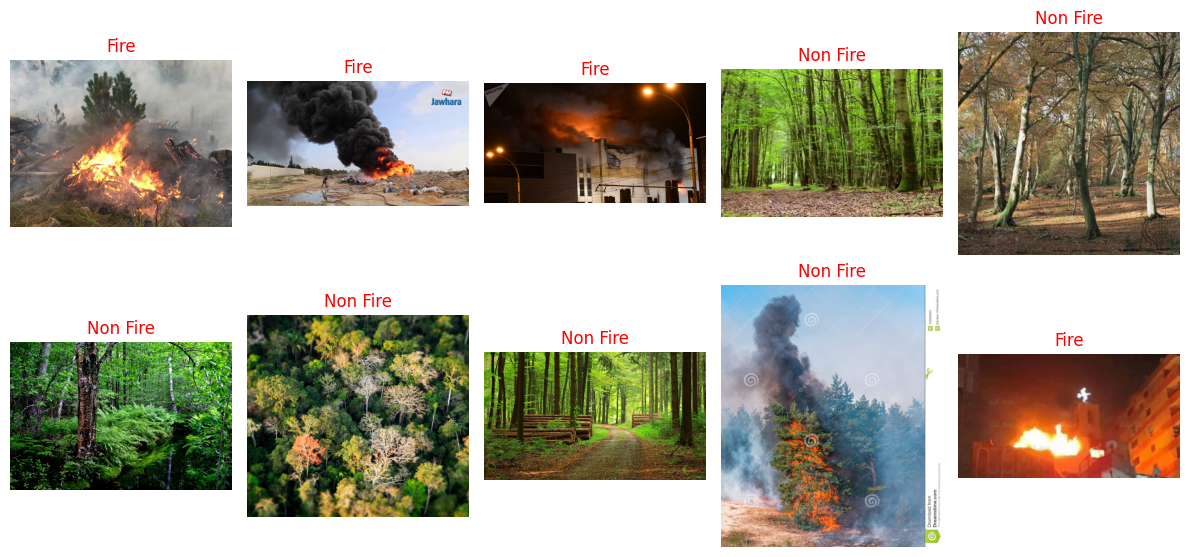

In [ ]:
display_image_grid(test_images_filepaths, predicted_labels)

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(images, test_size=0.5, random_state=42)

In [ ]:
import tensorflow as tf
import os
import random
import numpy as np

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed = 42
IMG_WIDTH = 64
IMG_HEIGHT = 64
IMG_CHANNELS = 3

TRAIN_PATH = train_df.tolist()
TEST_PATH = test_df.tolist()

In [ ]:
X = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
y = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

In [ ]:
TRAIN_PATH

['/content/fire_images/fire.280.png',
 '/content/non_fire_images/non_fire.199.png',
 '/content/fire_images/fire.148.png',
 '/content/fire_images/fire.96.png',
 '/content/non_fire_images/non_fire.55.png',
 '/content/non_fire_images/non_fire.200.png',
 '/content/fire_images/fire.3.png',
 '/content/fire_images/fire.128.png',
 '/content/non_fire_images/non_fire.102.png',
 '/content/fire_images/fire.124.png',
 '/content/non_fire_images/non_fire.140.png',
 '/content/fire_images/fire.196.png',
 '/content/non_fire_images/non_fire.193.png',
 '/content/non_fire_images/non_fire.221.png',
 '/content/non_fire_images/non_fire.204.png',
 '/content/non_fire_images/non_fire.4.png',
 '/content/non_fire_images/non_fire.35.png',
 '/content/non_fire_images/non_fire.80.png',
 '/content/non_fire_images/non_fire.48.png',
 '/content/non_fire_images/non_fire.207.png',
 '/content/non_fire_images/non_fire.56.png',
 '/content/fire_images/fire.145.png',
 '/content/fire_images/fire.60.png',
 '/content/fire_images/fi

Masks generator

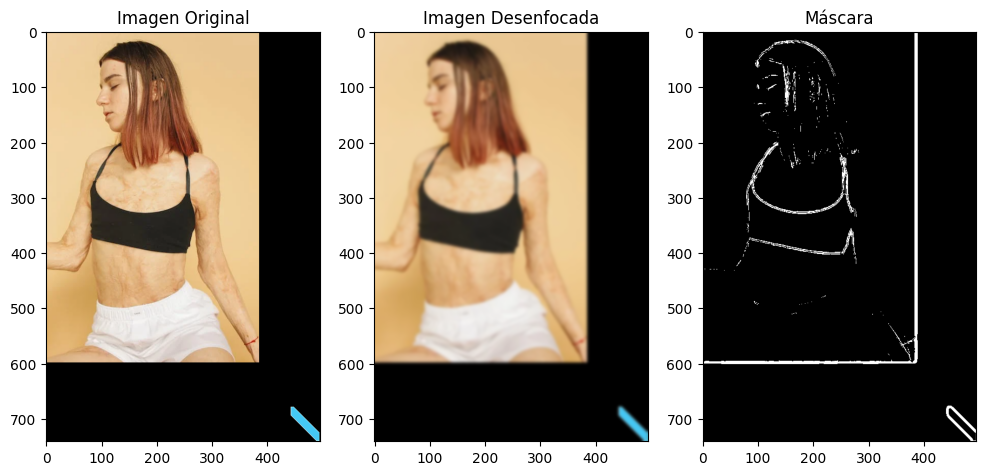

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carga una imagen
image = cv2.imread("persona.png")

# Aplica un filtro de desenfoque gaussiano
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

# Calcula la diferencia entre la imagen original y la imagen desenfocada
difference_image = cv2.absdiff(image, blurred_image)

# Convierte la diferencia a escala de grises
difference_gray = cv2.cvtColor(difference_image, cv2.COLOR_BGR2GRAY)

# Define un umbral para la máscara (puedes ajustar este valor)
threshold = 30

# Crea una máscara binaria utilizando el umbral
mask = np.where(difference_gray > threshold, 255, 0).astype(np.uint8)

# Crea una figura de Matplotlib para mostrar la imagen y la máscara
plt.figure(figsize=(12, 6))

# Muestra la imagen original
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")

# Muestra la imagen desenfocada
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title("Imagen Desenfocada")

# Muestra la máscara
plt.subplot(1, 3, 3)
plt.imshow(mask, cmap='gray')
plt.title("Máscara")

# Muestra la figura
plt.show()
